In [1]:
import numpy as np
from matplotlib import pyplot as plt

In [2]:
def rotate_array(l,x):
  return np.concatenate((l[-x:],l[:-x]),axis=0)

In [3]:
divisions = 1024

phi = np.arange(0,2*np.pi,(2*np.pi)/divisions)
len(phi)

1024

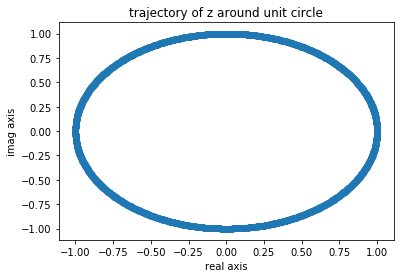

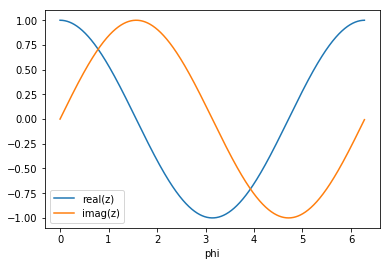

In [4]:
##################################################
##          z goes around unit circle           ##
##################################################


z = np.exp(phi*1j)

plt.title("trajectory of z around unit circle")
plt.scatter(np.real(z),np.imag(z))
plt.xlabel("real axis")
plt.ylabel("imag axis")
plt.show()

plt.plot(phi,np.real(z),label="real(z)")
plt.plot(phi,np.imag(z),label="imag(z)")
plt.xlabel("phi")
plt.legend()
plt.show()

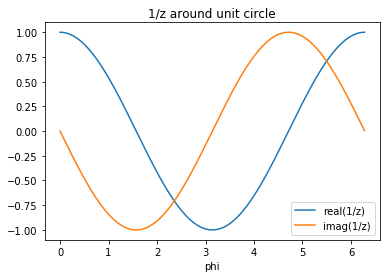

In [5]:
##################################################
##                  f(z) = 1/z                  ##
##################################################


#f = lambda z:1/z

f = 1/z

plt.plot(phi,np.real(f),label="real(1/z)")
plt.plot(phi,np.imag(f),label="imag(1/z)")
plt.title("1/z around unit circle")
plt.xlabel("phi")
plt.legend()
plt.show()

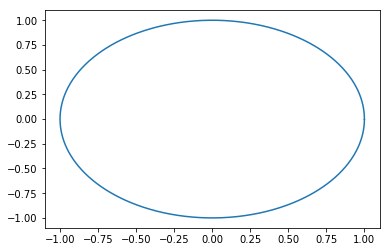

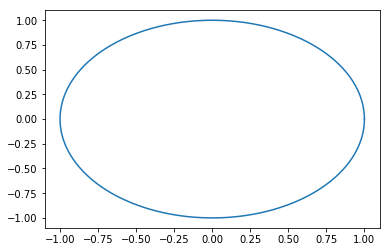

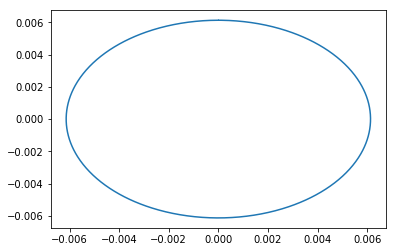

In [6]:
##################################################
##             the differential: dz             ##
##################################################

a = rotate_array(z,-1)

plt.plot(np.real(z),np.imag(z))
plt.show()
plt.plot(np.real(a),np.imag(a))
plt.show()

dz = a - z
plt.plot(np.real(dz),np.imag(dz))
plt.show()

In [7]:
##################################################
##        the numerical complex integral        ##
##################################################

I = 0

for i in range(0,len(phi)):
  I += f[i]*dz[i]

I

(-0.019276510616429897+6.2831458807342697j)